# Data preparation

In [1]:
import sys
import pandas as pd
import numpy as np
import plotly.express as px
import plotly as py
import matplotlib.pyplot as plt 
import seaborn as sns 

from collections import Counter
from PIL import Image

import pandas as pd
from pathlib import Path

import calendar
!pip install termcolor
from termcolor import colored
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)


In [10]:
df=pd.read_csv("dataset-3.csv",header= 0,encoding= 'unicode_escape')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape

(541909, 8)

This dataset contains 541,909 rows and 8 columns.


In [14]:
df.apply(lambda x: sum(x.isnull())) #Checking missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
#Replace null values in 2 column 'Description' and 'CustomerID' with 0
df['Description']=df['Description'].fillna(0) 
df['CustomerID']=df['CustomerID'].fillna(0) 

In [21]:
negative_values_check1 = (df['UnitPrice'] < 0).any()
negative_values_check2 = (df['Quantity'] < 0).any()
print(negative_values_check1)
print(negative_values_check2)

True
True


Both the Quantity and UnitPrice columns containe negative values. These negative values might stem from various factors such as canceled orders, potential fraudulent activities from competitor businesses, or errors related to customer visas or credit cards. As having negative sales quantities and prices are illogical, these negative values need to be removed from the dataset

In [44]:
df = df[(df['UnitPrice'] >= 0) & (df['Quantity'] >= 0)]

In [50]:
#remove duplicate invoice
duplicates = df[df.duplicated()]
df.drop_duplicates(inplace = True)
df.to_csv('cleaned_data.csv') #save cleaned dataset to new csv file name 'cleaned_data'

# Preliminary data

In [51]:
df=pd.read_csv('cleaned_data.csv')

#convert 'CustomerID' type into string
df['CustomerID']=df['CustomerID'].astype(str)
print(df['CustomerID'].dtype)

#create new column 'Sales amount' that equals to Unit price x quantity
df['Sales amount']=df['UnitPrice']*df['Quantity']

df.head()

object


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [57]:
#Products, Transactions and Customers quantity summary
pd.DataFrame([{'Products': df['StockCode'].nunique(),    
               'Orders': df['InvoiceNo'].nunique(),
               'Customers': df['CustomerID'].nunique(),
               'Countries': df['Country'].nunique(),
              }], columns = ['Products', 'Orders', 'Customers','Countries'], index = ['quantity'])

,Products,Orders,Customers,Countries
quantity,3941,20728,4340,38


Based on the preliminary data analysis:
- Transactions: There were a total of 20,728 transactions recorded.
- Products: These transactions involved 3,941 unique products.
- Customers: A total of 4,340 unique customers made these transactions.
- Countries: Transactions originated from customers in 38 diffmerent countries.

These insights summarize the key metrics from the preliminary data analysis, highlighting the scale and diversity of transactions, products, customers, and geographic spread represented in the dataset

In [59]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month_Year'] = df['InvoiceDate'].dt.strftime('%B %Y')
df['HourOfDay'] = df['InvoiceDate'].dt.hour
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales amount,DayOfWeek,Month_Year,HourOfDay
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December 2010,8
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December 2010,8
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December 2010,8
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December 2010,8
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December 2010,8


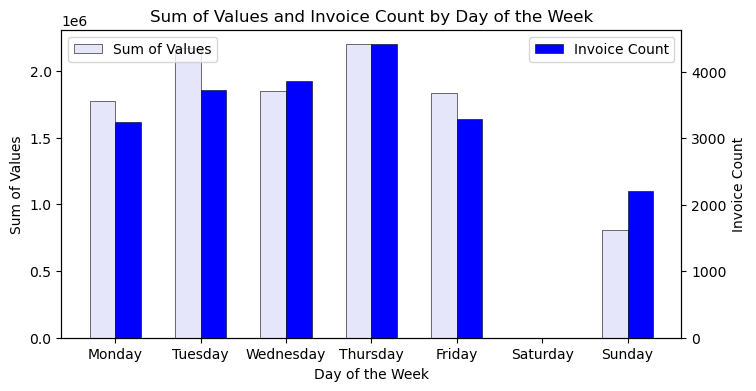

In [74]:
DayOfWeek_invoice_count = df.groupby('DayOfWeek')['InvoiceNo'].nunique()
DayOfWeek_values_sum = df.groupby('DayOfWeek')['Sales amount'].sum()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"] 
DayOfWeek_invoice_count = DayOfWeek_invoice_count.reindex(days_order)
DayOfWeek_values_sum = DayOfWeek_values_sum.reindex(days_order)

fig, ax1 = plt.subplots(figsize=(8, 4))

ax2 = ax1.twinx()
bar_width = 0.3
index = np.arange(len(days_order))

bar1 = ax1.bar(index, DayOfWeek_values_sum, bar_width, label='Sum of Values', color='lavender', edgecolor='black', linewidth=0.4)
bar2 = ax2.bar(index + bar_width, DayOfWeek_invoice_count, bar_width, label='Invoice Count', color='blue', edgecolor='black', linewidth=0.4)

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Sum of Values')
ax2.set_ylabel('Invoice Count')
ax1.set_title('Sum of Values and Invoice Count by Day of the Week')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(days_order)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

plt.show()

The distribution of transactions across various days exhibits variability, notably showcasing the highest aggregate purchase volume on Thursday. Conversely, Saturday registers no transactions within this dataset.

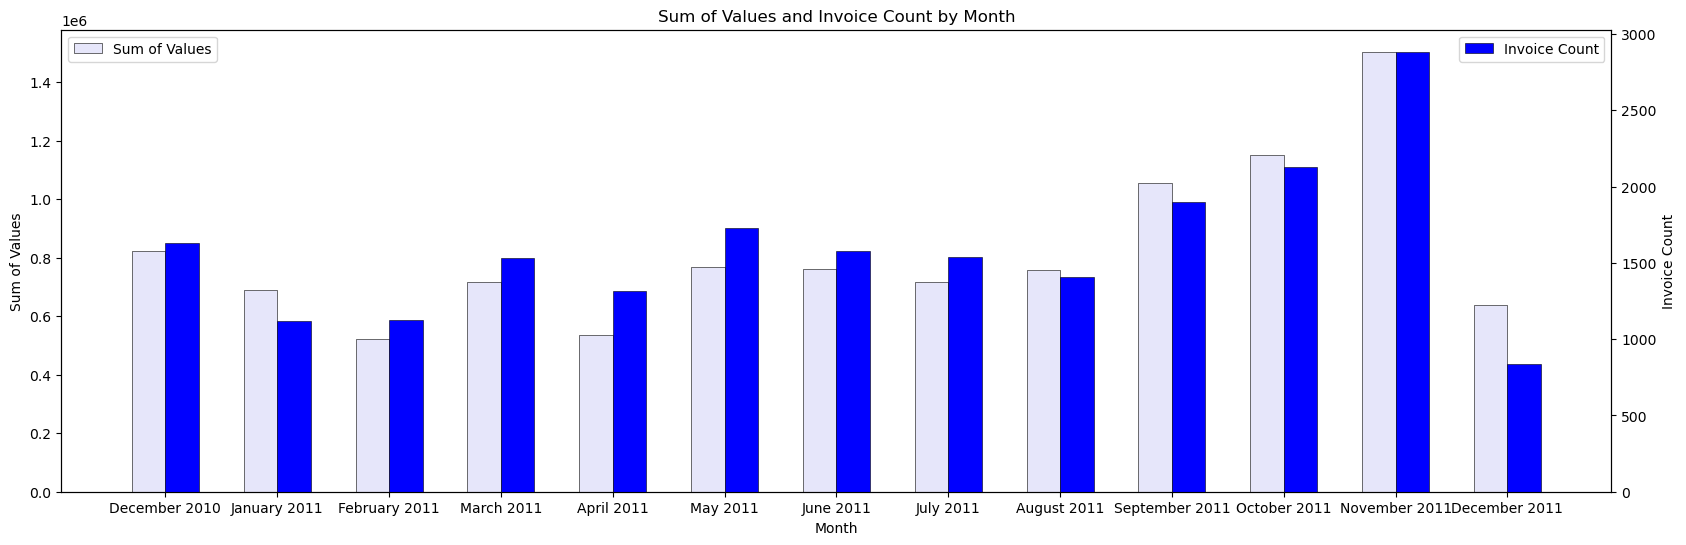

In [73]:
# no. of transactions for month

month_order = df['Month_Year'].unique()
Month_invoice_count = df.groupby(['Month_Year'])['InvoiceNo'].nunique()
Month_values_sum = df.groupby(['Month_Year'])['Sales amount'].sum()
Month_invoice_count.index = pd.to_datetime(Month_invoice_count.index, format='%B %Y')
Month_values_sum.index = pd.to_datetime(Month_values_sum.index, format='%B %Y')

month_order = df['Month_Year'].unique()

# Sort by index (which is now in datetime format)
Month_invoice_count = Month_invoice_count.sort_index()
Month_values_sum = Month_values_sum.sort_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(20, 6))

ax2 = ax1.twinx()
bar_width = 0.3
index = np.arange(len(month_order)) 

bar1 = ax1.bar(index, Month_values_sum, bar_width, label='Sum of Values', color='lavender', edgecolor='black', linewidth=0.4)
bar2 = ax2.bar(index + bar_width, Month_invoice_count, bar_width, label='Invoice Count', color='blue', edgecolor='black', linewidth=0.4)

ax1.set_xlabel('Month')
ax1.set_ylabel('Sum of Values', color='b')
ax2.set_ylabel('Invoice Count', color='r')
ax1.set_title('Sum of Values and Invoice Count by Month')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(month_order)  # Using 'month_order' for x-axis labeling
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

plt.show()

When conducting a month-to-month analysis, there is a noticeable disparity in the quantity of transactions per month. Specifically, November 2011 recorded 2,760 transactions, whereas the subsequent month, December, observed a substantial decrease to just 813 transactions. This variance in purchase volumes across months could stem from diverse factors such as seasonal shopping demands, promotional activities, among other potential influences.

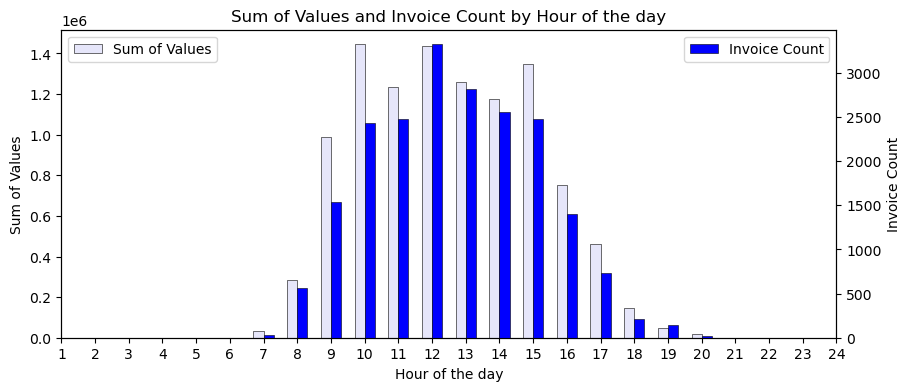

In [77]:
# no. of transactions for hour
HourOfDay_invoice_count = df.groupby('HourOfDay')['InvoiceNo'].nunique()
HourOfDay_values_sum = df.groupby('HourOfDay')['Sales amount'].sum()

hour_array = np.arange(1, 25)
HourOfDay_invoice_count = HourOfDay_invoice_count.reindex(hour_array)
HourOfDay_values_sum = HourOfDay_values_sum.reindex(hour_array)

fig, ax1 = plt.subplots(figsize=(10, 4))

ax2 = ax1.twinx()
bar_width = 0.3
index = np.arange(len(hour_array))

bar1 = ax1.bar(index, HourOfDay_values_sum, bar_width, label='Sum of Values', color='lavender', edgecolor='black', linewidth=0.4)
bar2 = ax2.bar(index + bar_width, HourOfDay_invoice_count, bar_width, label='Invoice Count', color='blue', edgecolor='black', linewidth=0.4)

ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Sum of Values', color='b')
ax2.set_ylabel('Invoice Count', color='r')
ax1.set_title('Sum of Values and Invoice Count by Hour of the day')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(hour_array)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')

plt.show()

The result shows that customer shopping activity peaks between 9 AM and 3 PM, with the highest values and invoice counts occurring from 10 AM to 1 PM. There is minimal activity from 1 AM to 6 AM and after 4 PM, indicating a midday shopping preference. 

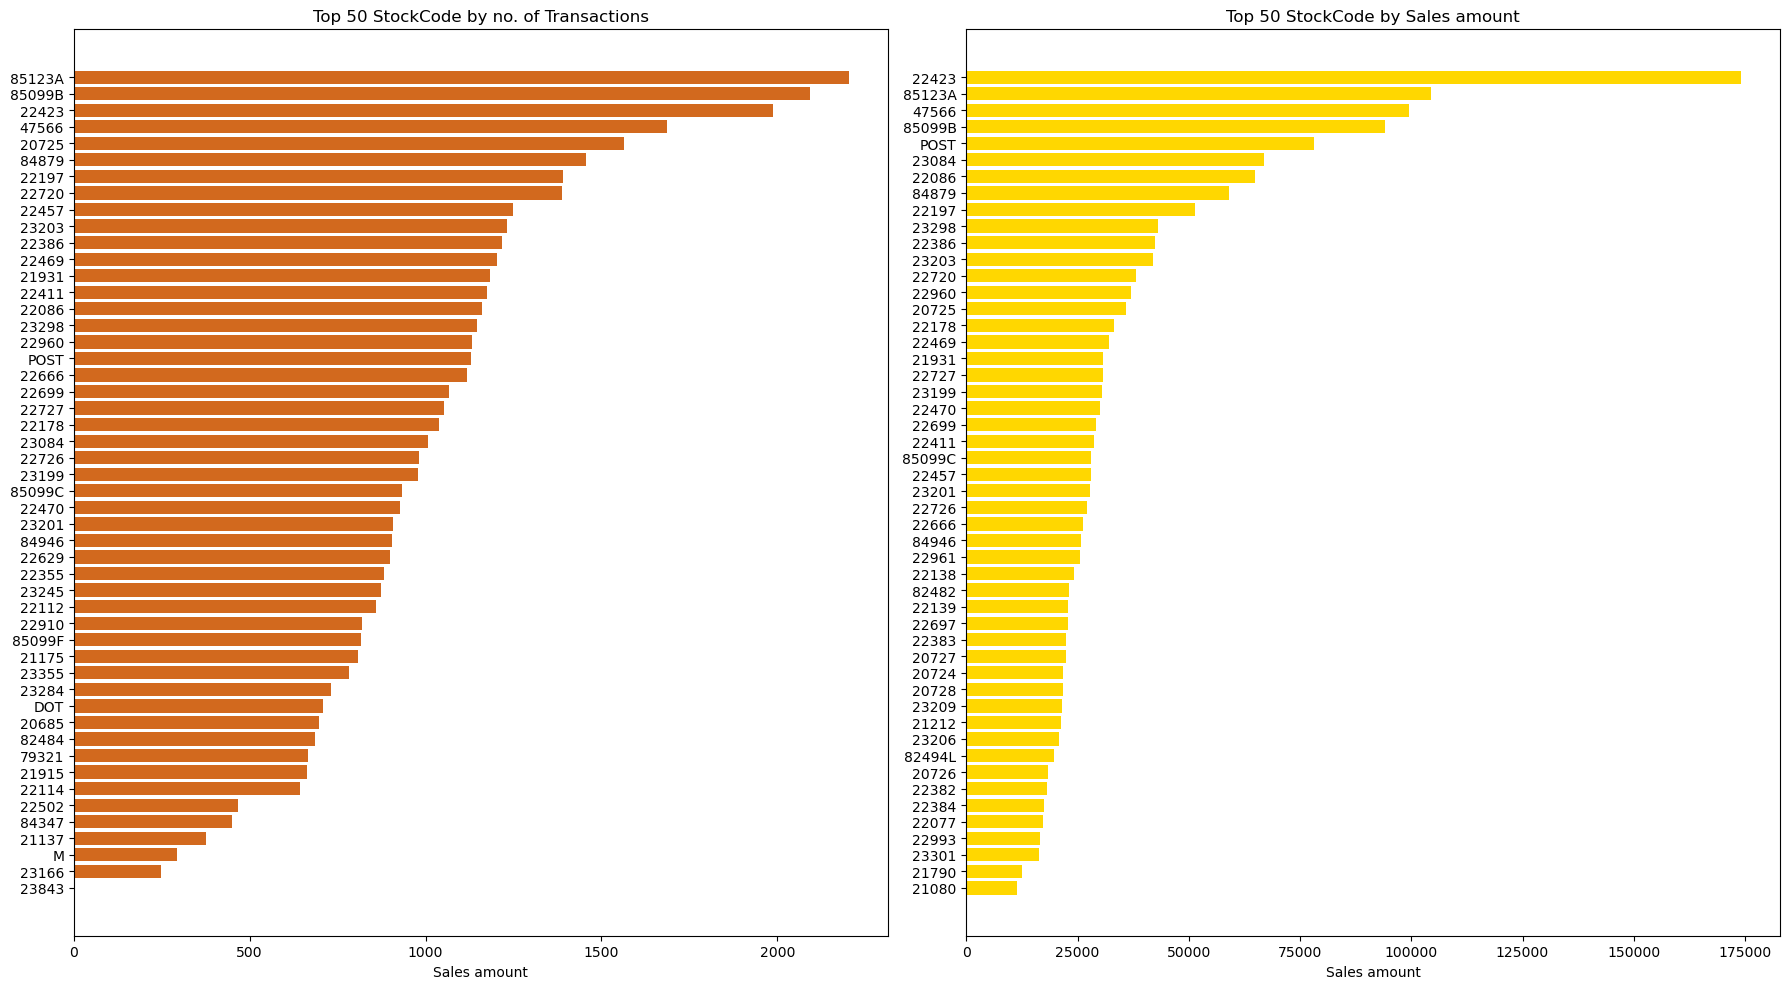

In [81]:
# Top purchased products
stockcode = df.groupby('StockCode').agg({
    'Sales amount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Sorting by Quantity and Values
stockcode_qty = stockcode.sort_values(by='InvoiceNo', ascending=False).reset_index()
stockcode_values = stockcode.sort_values(by='Sales amount', ascending=False).reset_index()

# Selecting top 20 for Quantity and Values
top_10_qty = stockcode_qty.head(50)
top_10_values = stockcode_values.head(50)

# Convert StockCode to string if it's not already
top_10_qty['StockCode'] = top_10_qty['StockCode'].astype(str)
top_10_values['StockCode'] = top_10_values['StockCode'].astype(str)

# Plotting top 20 StockCode based on Values and Quantity
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
top_10_values = top_10_values.sort_values('InvoiceNo', ascending=True)  
plt.barh(top_10_values['StockCode'], top_10_values['InvoiceNo'], color='chocolate')
plt.xlabel('Sales amount')
plt.title('Top 50 StockCode by no. of Transactions')

plt.subplot(1, 2, 2)
top_10_qty = top_10_qty.sort_values('Sales amount', ascending=True)  
plt.barh(top_10_qty['StockCode'], top_10_qty['Sales amount'], color='gold')
plt.xlabel('Sales amount')
plt.title('Top 50 StockCode by Sales amount')

plt.tight_layout()
plt.show()


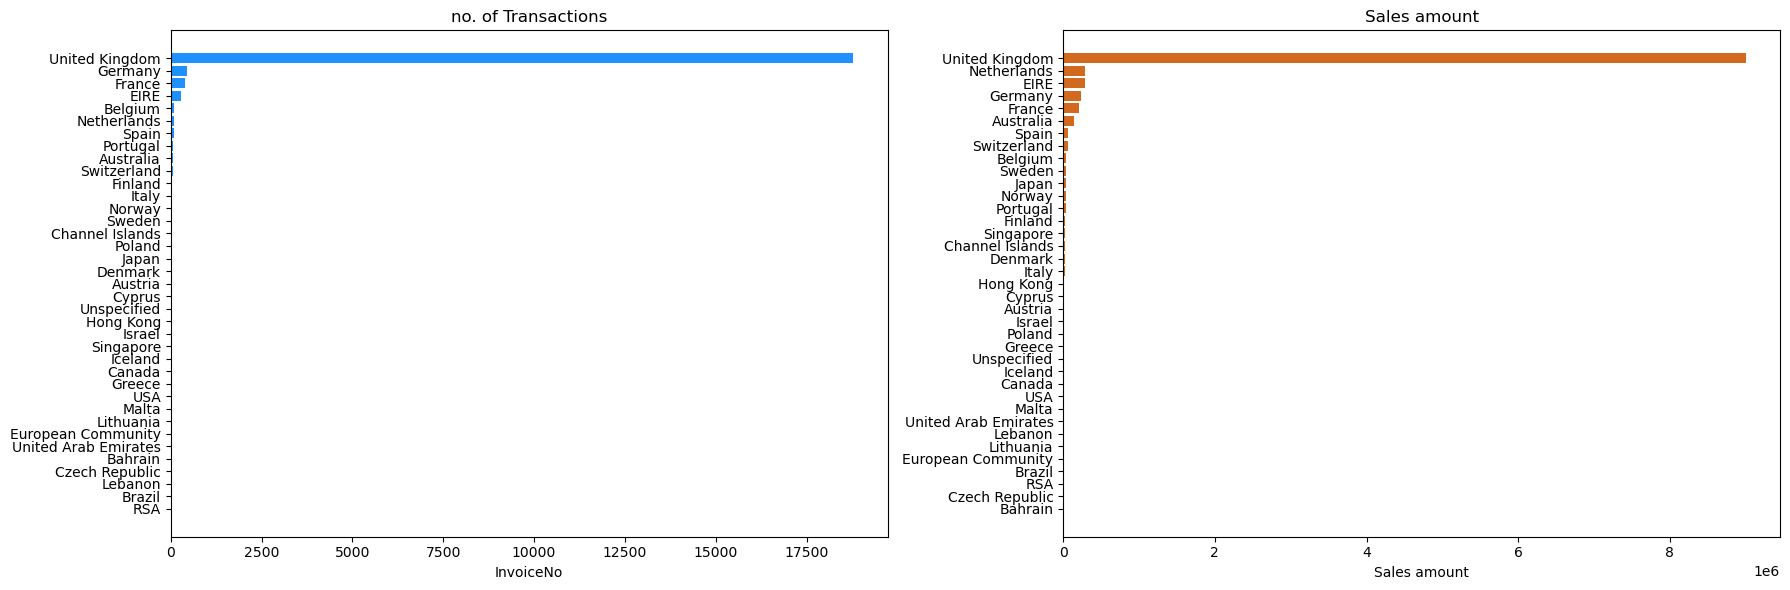

In [83]:
# Top Country   
customer = df.groupby('Country').agg({
    'Sales amount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Sorting by Quantity and Values
customer_qty = customer.sort_values(by='InvoiceNo', ascending=False).reset_index()
customer_values = customer.sort_values(by='Sales amount', ascending=False).reset_index()

# Selecting top 20 for Quantity and Values
top_20_qty = customer_qty.head(37)
top_20_values = customer_values.head(37)

# Convert StockCode to string if it's not already
top_20_qty['Country'] = top_20_qty['Country'].astype(str)
top_20_values['Country'] = top_20_values['Country'].astype(str)

# Plotting top 20 StockCode based on Values and Quantity
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
top_20_values = top_20_values.sort_values('InvoiceNo', ascending=True)  # Sort by Values in ascending order
plt.barh(top_20_values['Country'], top_20_values['InvoiceNo'], color='dodgerblue')
plt.xlabel('InvoiceNo')
plt.title('no. of Transactions')

plt.subplot(1, 2, 2)
top_20_qty = top_20_qty.sort_values('Sales amount', ascending=True)  # Sort by Quantity in ascending order
plt.barh(top_20_qty['Country'], top_20_qty['Sales amount'], color='chocolate')
plt.xlabel('Sales amount')
plt.title('Sales amount')

plt.tight_layout()
plt.show()

The United Kingdom overwhelmingly leads in both the number of transactions and sales amount, indicating it is the dominant market and contributes the majority of transactions and sales. This also suggests a concentrated market with potential for targeted marketing and resource allocation.

There is a noticeable presence in other European countries like Germany, France, and the Netherlands, but the volume is much lower, indicating potential growth opportunities in these regions.

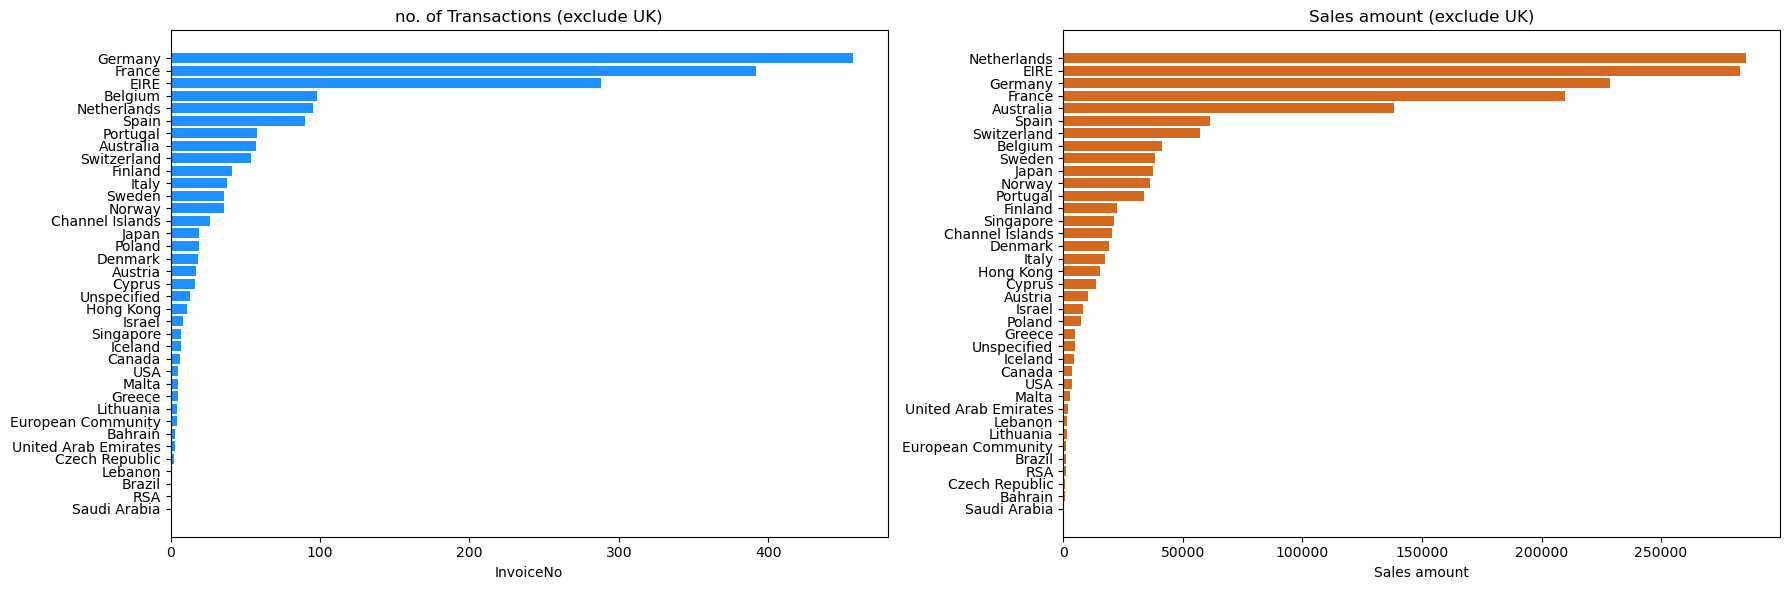

In [84]:
# Top Country exclude UK
customer = df.groupby('Country').agg({
    'Sales amount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

# Sorting by Quantity and Values
customer_qty = customer.sort_values(by='InvoiceNo', ascending=False).reset_index()
customer_values = customer.sort_values(by='Sales amount', ascending=False).reset_index()
customer_qty = customer_qty[customer_qty['Country'] != 'United Kingdom']
customer_values = customer_values[customer_values['Country'] != 'United Kingdom']


# Selecting top 20 for Quantity and Values
top_20_qty = customer_qty.head(37)
top_20_values = customer_values.head(37)

# Convert StockCode to string if it's not already
top_20_qty['Country'] = top_20_qty['Country'].astype(str)
top_20_values['Country'] = top_20_values['Country'].astype(str)

# Plotting top 20 StockCode based on Values and Quantity
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
top_20_values = top_20_values.sort_values('InvoiceNo', ascending=True)  # Sort by Values in ascending order
plt.barh(top_20_values['Country'], top_20_values['InvoiceNo'], color='dodgerblue')
plt.xlabel('InvoiceNo')
plt.title('no. of Transactions (exclude UK)')

plt.subplot(1, 2, 2)
top_20_qty = top_20_qty.sort_values('Sales amount', ascending=True)  # Sort by Quantity in ascending order
plt.barh(top_20_qty['Country'], top_20_qty['Sales amount'], color='chocolate')
plt.xlabel('Sales amount')
plt.title('Sales amount (exclude UK)')

plt.tight_layout()
plt.show()


Germany, France, and Ireland lead in transaction volumes, while the Netherlands and Ireland top the sales amounts, followed by Germany and France. This suggests strong market engagement in these countries. Notably, Australia, Spain, and Switzerland also show substantial sales, indicating promising growth opportunities. Businesses should focus marketing and resource allocation on these high-performing countries to maximize revenue and market presence.

# Recency Frequency Monetary value 

In [125]:
from datetime import datetime
import datetime as dt

df["InvoiceDate"] = df["InvoiceDate"].dt.date
snapshot_date = max(df.InvoiceDate) + dt.timedelta(days=1)

# RFM table
# Aggregate data by each customer
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (snapshot_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Sales amount': lambda x: x.sum()}).reset_index()
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)

# Rename columns
rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Sales amount': 'MonetaryValue'}, inplace=True)

rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,0.0,1,133320,1754901.91
1,12346.0,326,1,77183.60
2,12347.0,3,182,4310.00
3,12348.0,76,31,1797.24
4,12349.0,19,73,1757.55


- Recency indicates how much time elapsed since a customer last order.
- Frequency indicates how many times a customer ordered.
- Monetary value tells us how much a customer has spent purchasing items

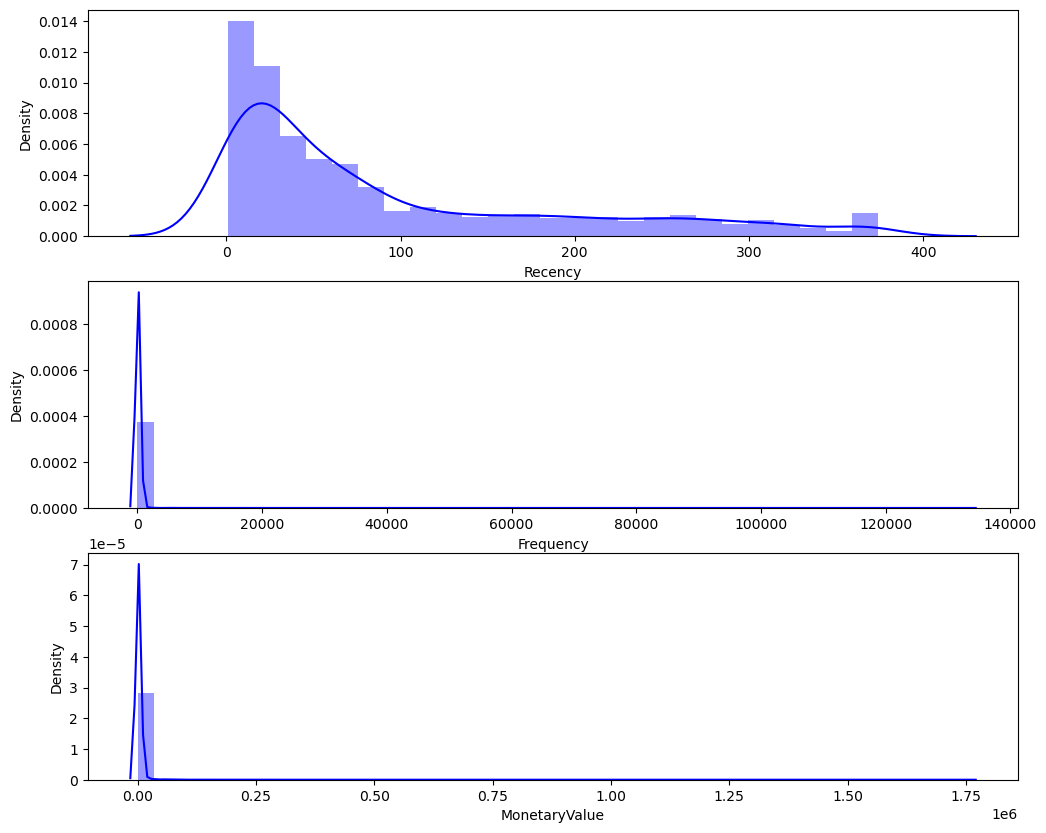

In [128]:
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
sns.distplot(rfm['Recency'],color='blue')
plt.subplot(3, 1, 2) 
sns.distplot(rfm['Frequency'], color='blue')
plt.subplot(3, 1, 3)
sns.distplot(rfm['MonetaryValue'], color='blue')
plt.show()

In [129]:
#Dividing RFM data into four quartiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75]) 
quantiles = quantiles.to_dict() 

# R_Score should be minimum so 1st quantile is set as 1.
def R_Score(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
    
# The higher the F_Score,M_Score the better so 1st quantile is set as 4.    
def FM_Score(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

# New column for R_Score to indicate numerical score between 1 to 4.
rfm['R_Score'] = rfm['Recency'].apply(R_Score, args=('Recency',quantiles))
# New column for F_Score to indicate numerical score between 1 to 4.
rfm['F_Score'] = rfm['Frequency'].apply(FM_Score, args=('Frequency',quantiles))
# New column for M_Score to indicate numerical score between 1 to 4.
rfm['M_Score'] = rfm['MonetaryValue'].apply(FM_Score, args=('MonetaryValue',quantiles))
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score
0,0.0,1,133320,1754901.91,1,1,1
1,12346.0,326,1,77183.60,4,4,1
2,12347.0,3,182,4310.00,1,1,1
3,12348.0,76,31,1797.24,3,3,1
4,12349.0,19,73,1757.55,2,2,1


In [130]:
#Adding R,F,M Scores to one new column
rfm['RFM_Score'] = rfm.R_Score.astype(str)+ rfm.F_Score.astype(str) + rfm.M_Score.astype(str)
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
0,0.0,1,133320,1754901.91,1,1,1,111
1,12346.0,326,1,77183.60,4,4,1,441
2,12347.0,3,182,4310.00,1,1,1,111
3,12348.0,76,31,1797.24,3,3,1,331
4,12349.0,19,73,1757.55,2,2,1,221


In [131]:
# Calculate RFM_Score
rfm['RFM_Total_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)
rfm['RFM_Total_Score'].unique()

array([ 3,  9,  7,  5, 11, 12,  8,  4,  6, 10], dtype=int64)

In [97]:
# Define rfm_level function
def RFM_Total_Score(df):

    if (df['RFM_Total_Score'] >= 11):# For RFM score with values 11,12
        return 'Champions' 
    elif (df['RFM_Total_Score'] == 10):# For RFM score with value 10
        return 'Loyal Customers' 
    elif (df['RFM_Total_Score'] == 9): # For RFM score with value 9
        return 'Recent Customers'
    elif (df['RFM_Total_Score'] == 8): # For RFM score with value 8
         return 'Promising'
    elif (df['RFM_Total_Score'] == 7): # For RFM score with value 7
        return 'Customers Needing Attention'
    elif (df['RFM_Total_Score'] == 6): # For RFM score with value 6
        return 'Cant lose them'
    elif (df['RFM_Total_Score'] == 5): # For RFM score with value 5
        return 'At Risk'
    else:                               # For RFM score with value less than 5
        
        return 'Lost'
# Create a new variable RFM_Level
rfm['Customer_Segmentation'] =rfm.apply(RFM_Total_Score, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Total_Score,Customer_Segmentation
0,0.0,1,1,1,111,3,Lost
1,12346.0,4,4,1,441,9,Recent Customers
2,12347.0,1,1,1,111,3,Lost
3,12348.0,3,3,1,331,7,Customers Needing Attention
4,12349.0,2,2,1,221,5,At Risk


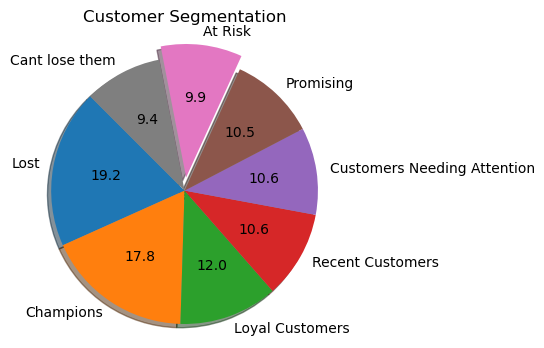

In [109]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm['Customer_Segmentation'].value_counts().plot.pie(figsize=(4,4),startangle=135, explode=(0,0,0,0,0,0,0.1,0),autopct='%.1f',shadow=True)
plt.title("Customer Segmentation",size=12)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

Since total customers are divided into 9 segments, it can be seen that 19.6% of customers are already lost, accounting for the largest portion of the customers. To be worth noticing, 9.9% customers are at risk of losing them as customers and 9.6% customers we can't lose. 

In [132]:
#op 10 Churned best customers who has not purchased anything in a while
churned=rfm[(rfm['RFM_Score']=='411')].sort_values('M_Score', ascending=False).head(10)
churned

,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score
32,12383.0,185,99,1850.56,4,1,1,411,6
124,12501.0,337,149,2169.39,4,1,1,411,6
4301,18231.0,193,123,2071.77,4,1,1,411,6
4018,17850.0,373,297,5391.21,4,1,1,411,6
3979,17787.0,153,128,1817.54,4,1,1,411,6
3766,17504.0,207,127,2997.03,4,1,1,411,6
3726,17444.0,148,135,2940.04,4,1,1,411,6
3697,17406.0,334,111,2184.42,4,1,1,411,6
3641,17337.0,152,521,1981.06,4,1,1,411,6
3357,16919.0,157,326,2592.25,4,1,1,411,6


These customers used to place orders with huge amounts very frequently but they did not place orders from almost a year which means they are purchasing from other companies. These groups of people should be targeted with offers to gain them back

In [133]:
rfm[(rfm['RFM_Score']=='144')|(rfm['RFM_Score']=='143')].sort_values('M_Score', ascending=False).head(10)


,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score,RFM_Total_Score
20,12367.0,5,11,168.90,1,4,4,144,9
3133,16620.0,4,9,178.96,1,4,4,144,9
3115,16596.0,16,12,250.15,1,4,4,144,9
3097,16569.0,4,5,124.20,1,4,4,144,9
3070,16528.0,4,17,244.41,1,4,4,144,9
2907,16313.0,4,16,274.15,1,4,4,144,9
2825,16189.0,16,11,215.48,1,4,4,144,9
2675,15992.0,4,3,41.99,1,4,4,144,9
2528,15783.0,11,14,246.30,1,4,4,144,9
2417,15634.0,18,15,243.55,1,4,4,144,9


The above customers has the potential to become best customers this people should be targeted to convert them into loyal customers.All these different segment of customers should be targeted with different tailored advertisments and rewards for increased profits and more responsiveness from customers.